# Project Title

**Introduction**
- This is the final project for CS 543 Machine Learning Course
- This data consists of numerical and categorical features and is primarily used for classification purposes. Feture descriptions of the model is below. 

#### Feature Descriptions 

| Features                      | Description                                                                                                                   |
|-------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|``Age``                        | The age of employee.                                                                                                          |
|``Attrition``                  | Whether the employee left the company or not.                                                                                 |
|``BusinessTravel``             | The frequency or type of business-related travel that an employee undertakes.                                                 |
|``DailyRate``                  | The daily rate of pay for an employee                                                                                         |
|``Department``                 | The department or division within a company where the employee works.                                                         |
|``DistanceFromHome``           | Distance in miles from the employee's home and their workplace.                                                               |
|``Education``                  | The highest level of education completed by the employee.                                                                     |
|``EducationField``             | The field or area of study in which the employee's education is focused.                                                      |
|``EmployeeCount``              | The number of employees.                                                                                                      |
|``EmployeeNumber``             | A unique identifier of the employee.                                                                                          |
|``EnvironmentSatisfaction``    | The level of satisfaction or contentment an employee has with their work environment.                                         |
|``Gender``                     | Gender identity of the employee.                                                                                              |
|``HourlyRate``                 | The hourly rate of pay for an employee                                                                                        |
|``JobInvolvement``             | The degree to which an employee is engaged and involved in their job tasks and responsibilities.                              |
|``JobLevel``                   | Rank of the employee within the company.                                                                                      |
|``JobRole``                    | Position that the employee holds within their department or team.                                                             |
|``JobSatisfaction``            | The level of satisfaction or contentment an employee has with their job.                                                      |
|``MaritalStatus``              | The marital status of the employee.                                                                                           |
|``MonthlyIncome``              | The monthly income or salary earned by the employee.                                                                          |
|``MonthlyRate``                | ?????                                                                                                                         |
|``NumCompaniesWorked``         | The number of different companies that the employee has worked for.                                                           |
|``Over18``                     | Whether the employee is over 18 years old.                                                                                    |
|``OverTime``                   | Whether the employee works overtime hours.                                                                                    |
|``PercentSalaryHike``          | The percentage increase in salary that an employee received.                                                                  |
|``PerformanceRating``          | The rating or evaluation of an employee's performance.                                                                        |
|``RelationshipSatisfaction``   | The level of satisfaction or contentment an employee has with their relationships at work.                                    |
|``StandardHours``              | The standard number of hours worked per week or per day.                                                                      |
|``StockOptionLevel``           | The level or amount of stock options granted to an employee as part of their compensation package.                            |
|``TotalWorkingYears``          | The total number of years that an employee has been working.                                                                  |
|``TrainingTimesLastYear``      | The number of training sessions attended by the employee in the last year.                                                    |
|``WorkLifeBalance``            | The balancebetween an employee's work responsibilities and their personal life.                                               |
|``YearsAtCompany``             | Number of years at the company.                                                                                               |
|``YearsInCurrentRole``         | The number of years that an employee has been in their current role.                                                          |
|``YearsSinceLastPromotion``    | The number of years since the employee's last promotion.                                                                      |
|``YearsWithCurrManager``       | The number of years that an employee has been under their current manager's supervision.                                      |

### 1. Data Collection
- This dataset has been sourced from Kaggle. The link to this dataset is: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset 
- In this section we will import all the necessary libraries, load and view the data. 

#### 1.1 Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import randint as sp_randint

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

# Importing MathLibrary 
import MathLibrary.MathFunctions as mf

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn import tree

from sklearn.tree import export_graphviz
from graphviz import Source

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix


import tensorflow as tf

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 40)
sns.set_style("darkgrid")
sns.set_palette("tab10")

#### 1.2 Loading and Viewing the data

In [2]:
df = pd.read_csv("./data/HR-Employee-Attrition.csv")

employee = df.copy()
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Our data includes categorical variables currently represented by numerical codes. To help in visual analysis, it might be better to convert the codes to their corresponding category names. 

In [3]:
education_dict = {
    1:"below_college",
    2:"college",
    3:"bachelor",
    4:"masters",
    5:"doctor"
}

environmentSatisfaction_dict = {
    1:"low",
    2:"medium",
    3:"high",
    4:"very_high"
}

jobinvolvement_dict = {
    1:"low",
    2:"medium",
    3:"high",
    4:"very_high"
}

jobsatisfaction_dict = {
    1:"low",
    2:"medium",
    3:"high",
    4:"very_high"
}

performancerating_dict = {
    1:"low",
    2:"good",
    3:"excellent",
    4:"outstanding"
}

relationshipsatisfaction_dict = {
    1:"low",
    2:"medium",
    3:"high",
    4:"very_high"
}

worklifebalance_dict = {
    1:"bad",
    2:"good",
    3:"better",
    4:"best"
}

employee['Education'] = employee['Education'].replace(education_dict)
employee['EnvironmentSatisfaction'] = employee['Education'].replace(environmentSatisfaction_dict)
employee['JobInvolvement'] = employee['Education'].replace(jobinvolvement_dict)
employee['JobSatisfaction'] = employee['Education'].replace(jobsatisfaction_dict)
employee['PerformanceRating'] = employee['Education'].replace(performancerating_dict)
employee['RelationshipSatisfaction'] = employee['Education'].replace(relationshipsatisfaction_dict)
employee['WorkLifeBalance'] = employee['Education'].replace(worklifebalance_dict)
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,college,Life Sciences,1,1,college,Female,94,college,2,Sales Executive,college,Single,5993,19479,8,Y,Yes,11,college,college,80,0,8,0,college,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,below_college,Life Sciences,1,2,below_college,Male,61,below_college,2,Research Scientist,below_college,Married,5130,24907,1,Y,No,23,below_college,below_college,80,1,10,3,below_college,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,college,Other,1,4,college,Male,92,college,1,Laboratory Technician,college,Single,2090,2396,6,Y,Yes,15,college,college,80,0,7,3,college,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,masters,Life Sciences,1,5,masters,Female,56,masters,1,Research Scientist,masters,Married,2909,23159,1,Y,Yes,11,masters,masters,80,0,8,3,masters,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,below_college,Medical,1,7,below_college,Male,40,below_college,1,Laboratory Technician,below_college,Married,3468,16632,9,Y,No,12,below_college,below_college,80,1,6,3,below_college,2,2,2,2


#### 1.3 Data Skimming

In [4]:
num_cols = employee.select_dtypes(include=[np.number]).columns
cat_cols = employee.select_dtypes(exclude=[np.number]).columns

pd.DataFrame({
    'feature': employee.columns.values,
    'data_type': employee.dtypes.values,
    'null_value(%)': employee.isna().mean().values * 100,
    'neg_value(%)': [len(employee[col][employee[col] < 0]) / len(employee) * 100 if col in num_cols else 0 for col in employee.columns],
    '0_value(%)': [len(employee[col][employee[col] == 0]) / len(employee) * 100 if col in num_cols else 0 for col in employee.columns],
    'duplicate' : employee.duplicated().sum(),
    'n_unique': employee.nunique().values,
    'sample_unique': [employee[col].unique() for col in employee.columns]}
).round(1)


,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,Age,int64,0.0,0.0,0.0,0,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,object,0.0,0.0,0.0,0,2,"[Yes, No]"
2,BusinessTravel,object,0.0,0.0,0.0,0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,int64,0.0,0.0,0.0,0,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,object,0.0,0.0,0.0,0,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,int64,0.0,0.0,0.0,0,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,object,0.0,0.0,0.0,0,5,"[college, below_college, masters, bachelor, do..."
7,EducationField,object,0.0,0.0,0.0,0,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,int64,0.0,0.0,0.0,0,1,[1]
9,EmployeeNumber,int64,0.0,0.0,0.0,0,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


To gain an initial insight into the distribution of our data, we can generate boxplots for all numerical columns.

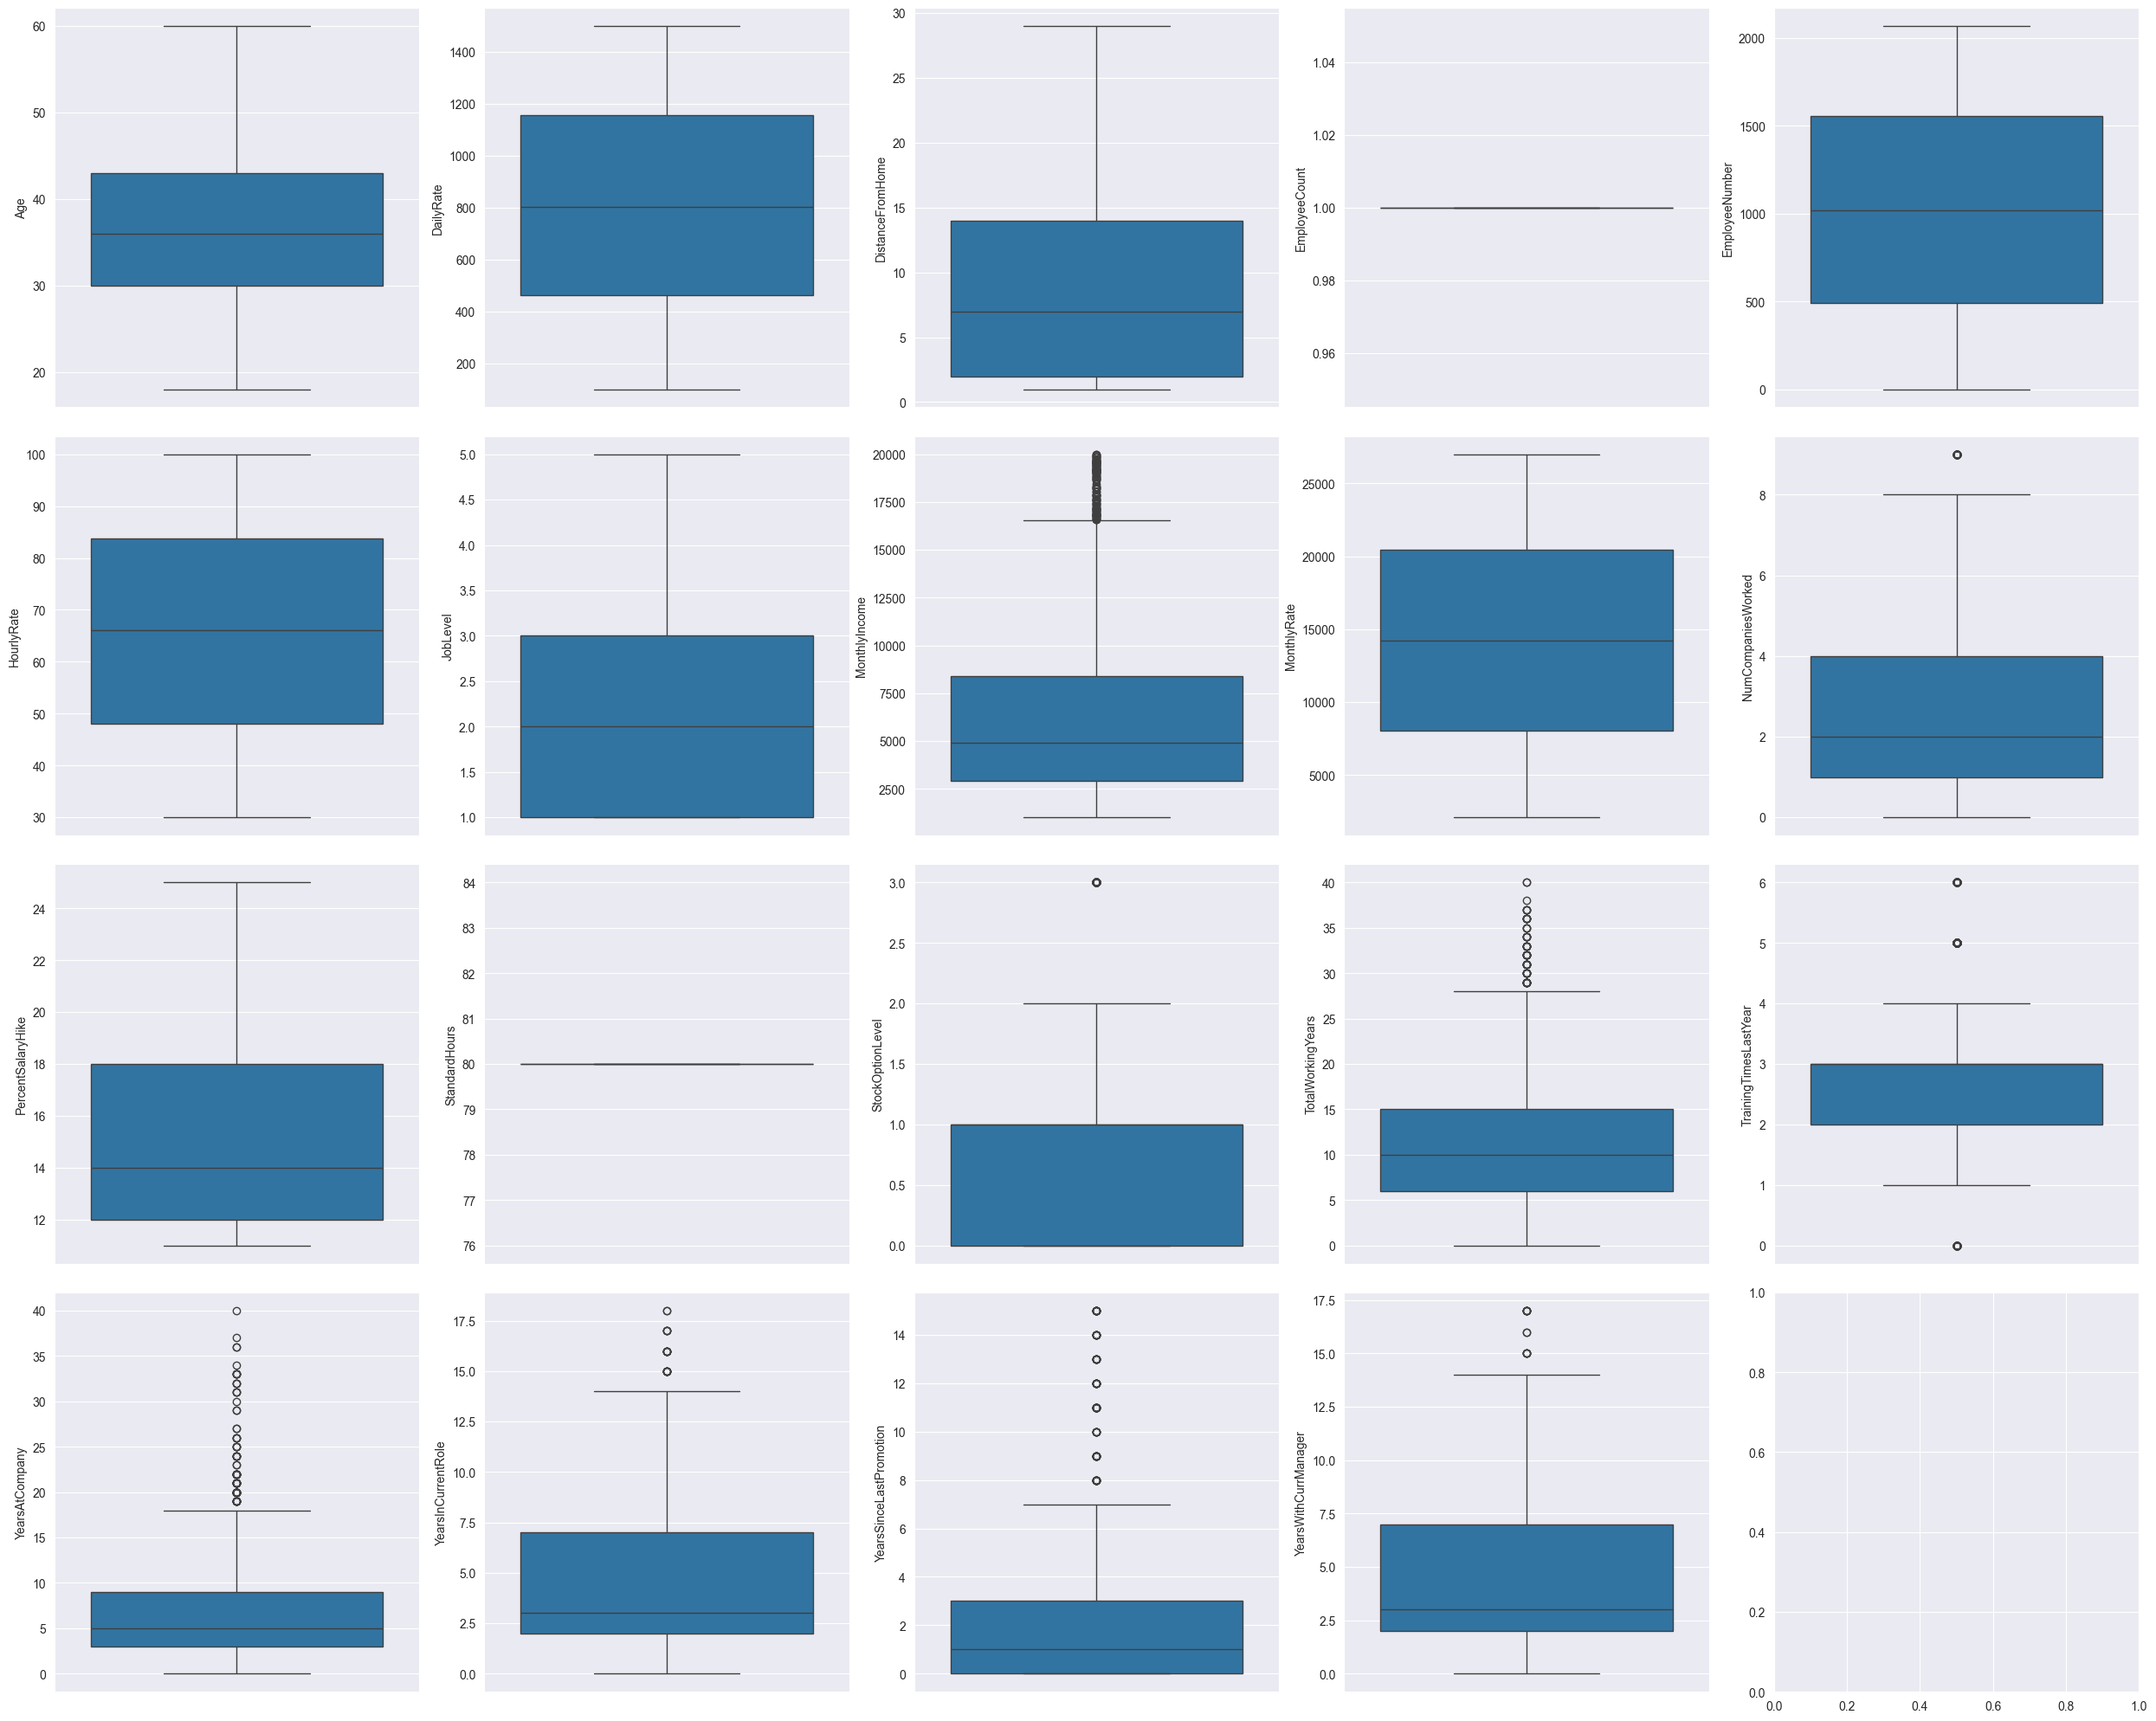

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(25,20))
index = 0
axs = axs.flatten()
for k, v in employee.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=employee, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

Some columns to drop: `EmployeeCount`, `StandardHours`, `EmployeeNumber`. After dropping the columns let us once again get the numerical and categorial columns.

In [6]:
employee = employee.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)

num_cols = employee.select_dtypes(include=[np.number]).columns
cat_cols = employee.select_dtypes(exclude=[np.number]).columns

print(num_cols)
cat_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

### 2. Data Preprocessing 
- There are no missing values
- Provide Statistics
- Check for outliers
- Check datatypes and categories

#### 2.1 Missing Values

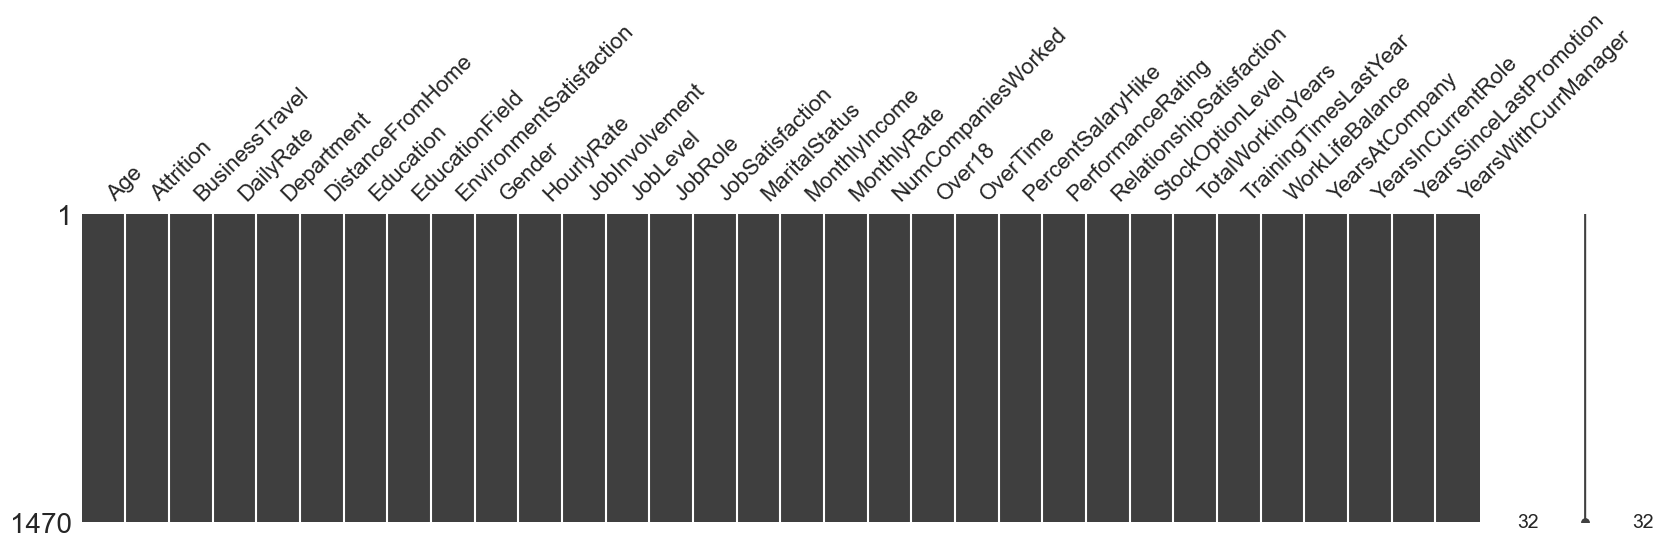

In [7]:
msno.matrix(employee, figsize=(20,4))
plt.show()

#### 2.2 Statistics 

In [8]:
num_cols = employee.select_dtypes(include=[np.number]).columns
cat_cols = employee.select_dtypes(exclude=[np.number]).columns


pd.DataFrame({
    "Columns": num_cols,
    'mean': [mf.calculate_mean(employee[col]) for col in num_cols],
    'Median': [mf.calculate_median(employee[col]) for col in num_cols],
    'Standard Deviation': [mf.calculate_std_dev(employee[col]) for col in num_cols],
    'Variance': [mf.calculate_var(employee[col]) for col in num_cols],
    'Max': [max(employee[col]) for col in num_cols],
    'Min': [min(employee[col]) for col in num_cols]
}).round(1)

,Columns,mean,Median,Standard Deviation,Variance,Max,Min
0,Age,36.9,36.0,9.1,83.4,60,18
1,DailyRate,802.5,802.0,403.4,162708.8,1499,102
2,DistanceFromHome,9.2,7.0,8.1,65.7,29,1
3,HourlyRate,65.9,66.0,20.3,413.0,100,30
4,JobLevel,2.1,2.0,1.1,1.2,5,1
5,MonthlyIncome,6502.9,4919.0,4706.4,22149778.9,19999,1009
6,MonthlyRate,14313.1,14235.5,7115.4,50628413.6,26999,2094
7,NumCompaniesWorked,2.7,2.0,2.5,6.2,9,0
8,PercentSalaryHike,15.2,14.0,3.7,13.4,25,11
9,StockOptionLevel,0.8,1.0,0.9,0.7,3,0


### 3. Exploratory Data Analysis (EDA)
The following plots are mainly for exploration purposes.

#### 3.1 Attrition

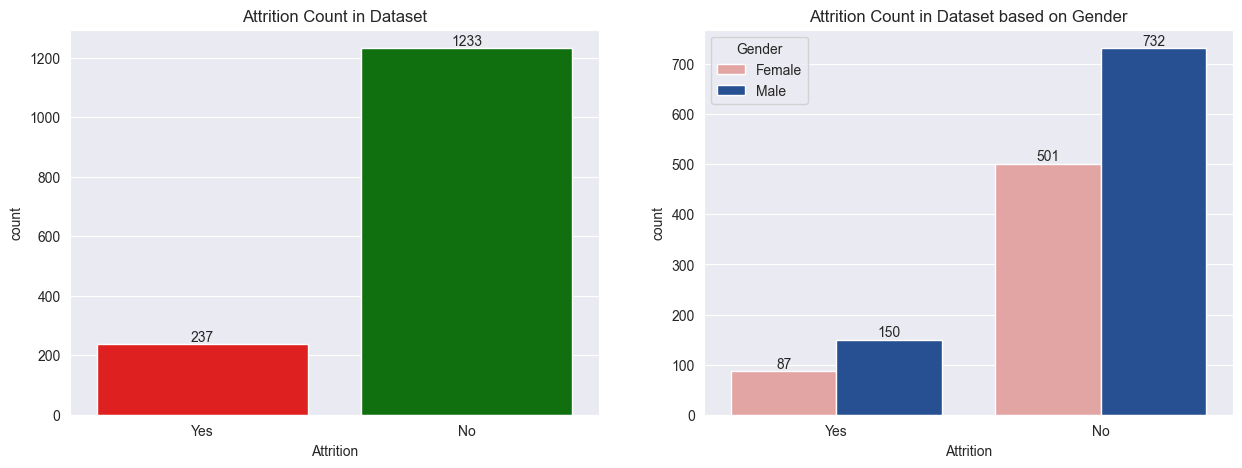

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

attrition = sns.countplot(data=employee, x='Attrition', ax=axs[0], palette=["red", "green"])
axs[0].set_title('Attrition Count in Dataset')
attrition.bar_label(attrition.containers[0])
attrition.bar_label(attrition.containers[1])

gender_attrition = sns.countplot(data=employee, x='Attrition', hue='Gender', ax=axs[1], palette=["#EE9999", "#144CA3"])
axs[1].set_title("Attrition Count in Dataset based on Gender")
for cont in gender_attrition.containers:
    gender_attrition.bar_label(cont)

plt.show()

#### 3.2 Age

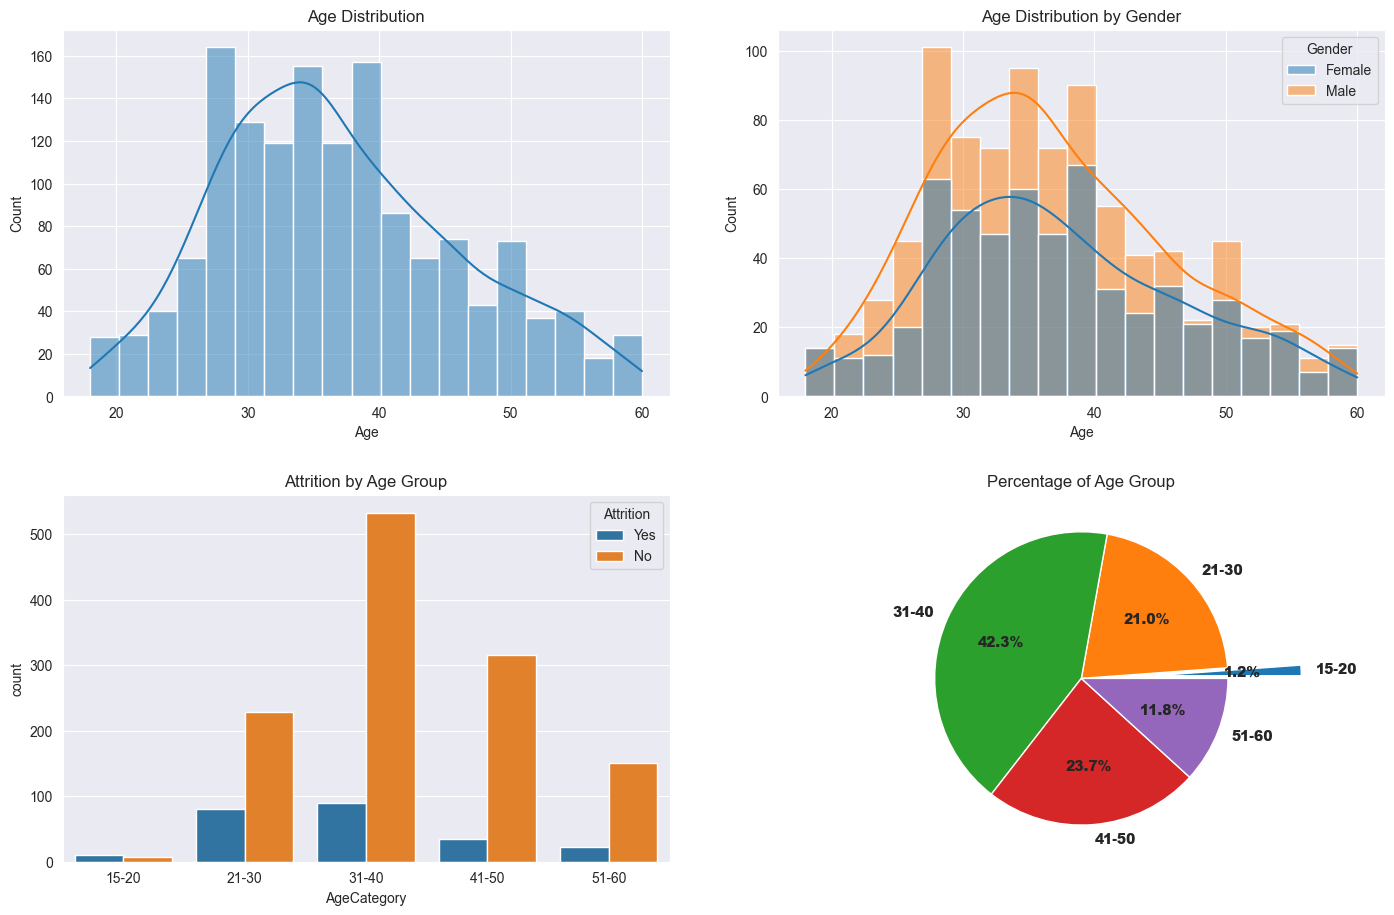

In [10]:
age_eda = employee.copy()

bin_edges = [15,20,30,40,50,np.inf]
labels = ['15-20', '21-30', '31-40', '41-50', '51-60']

age_eda['AgeCategory'] = pd.cut(age_eda['Age'], bins=bin_edges, labels=labels, right=False)
age_eda.head()

age_counts = age_eda["AgeCategory"].value_counts(sort=False)

fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5.0)

sns.histplot(data=employee, x='Age', kde=True, ax=axs[0,0])
axs[0,0].set_title('Age Distribution')

sns.histplot(data=employee, x='Age', hue='Gender', kde=True, ax=axs[0,1], alpha= 0.5)
axs[0,1].set_title('Age Distribution by Gender')

sns.countplot(data=age_eda, x='AgeCategory', hue='Attrition', ax=axs[1,0])
axs[1,0].set_title('Attrition by Age Group')

plt.pie(age_counts, labels=labels, autopct="%.1f%%", explode=[0.5, 0, 0, 0, 0],startangle=0, textprops={"fontweight":"black","size":10})
axs[1,1].set_title('Percentage of Age Group')

plt.show()

#### 3.3 Business Travel

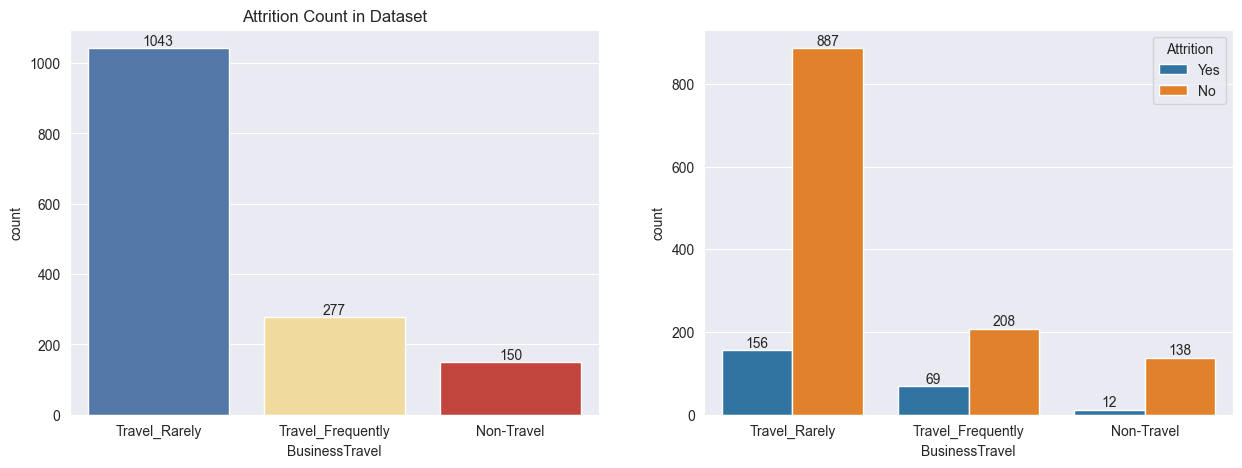

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

palette = ["#4575b4", "#fee090", "#d73027"]
travel = sns.countplot(data=employee, x='BusinessTravel', ax=axs[0], palette=palette)
axs[0].set_title('Attrition Count in Dataset')
travel.bar_label(travel.containers[0])
travel.bar_label(travel.containers[1])
travel.bar_label(travel.containers[2])

education_travel = sns.countplot(data=employee, x='BusinessTravel', hue='Attrition', ax=axs[1] )
# with_hue(education_travel, employee["BusinessTravel"], 3, 2)
for cont in education_travel.containers:
    education_travel.bar_label(cont)


plt.show()

#### 3.4 Daily Rate

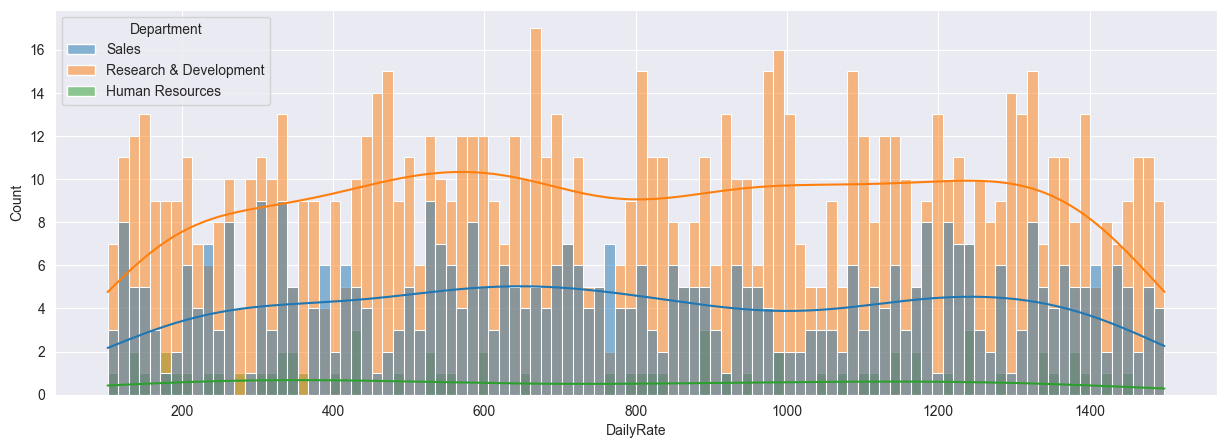

In [12]:
fig, axs = plt.subplots(figsize=(15,5))

sns.histplot(data=employee, x='DailyRate', bins=100, kde=True, alpha=0.5, hue='Department')
plt.show()

#### 3.5 Department

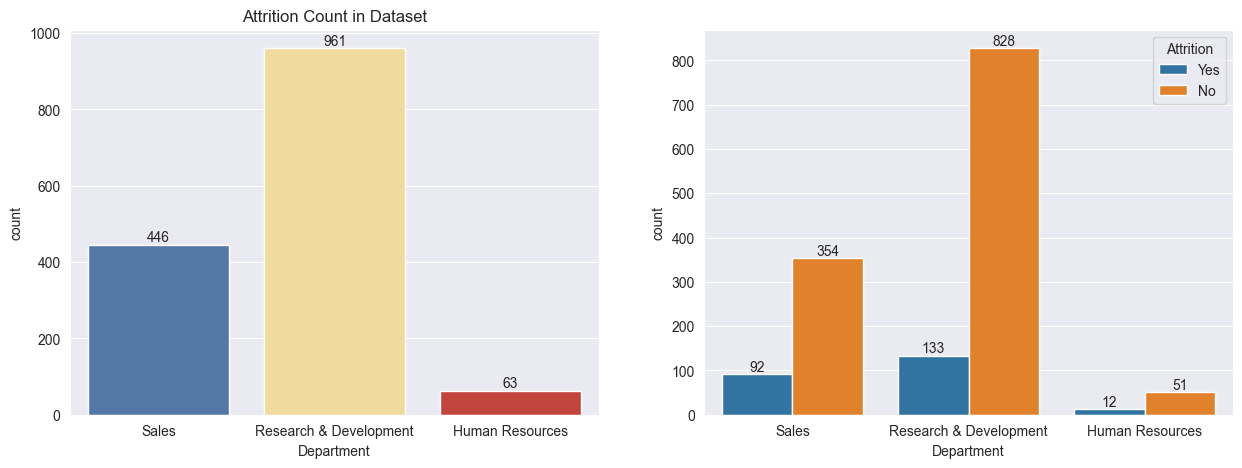

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

palette = ["#4575b4", "#fee090", "#d73027"]
department = sns.countplot(data=employee, x='Department', ax=axs[0], palette=palette)
axs[0].set_title('Attrition Count in Dataset')
department.bar_label(department.containers[0])
department.bar_label(department.containers[1])
department.bar_label(department.containers[2])


department_attrition = sns.countplot(data=employee, x='Department', hue='Attrition', ax=axs[1])
for cont in department_attrition.containers:
    department_attrition.bar_label(cont)

plt.show()

#### 3.6 Distance from Home

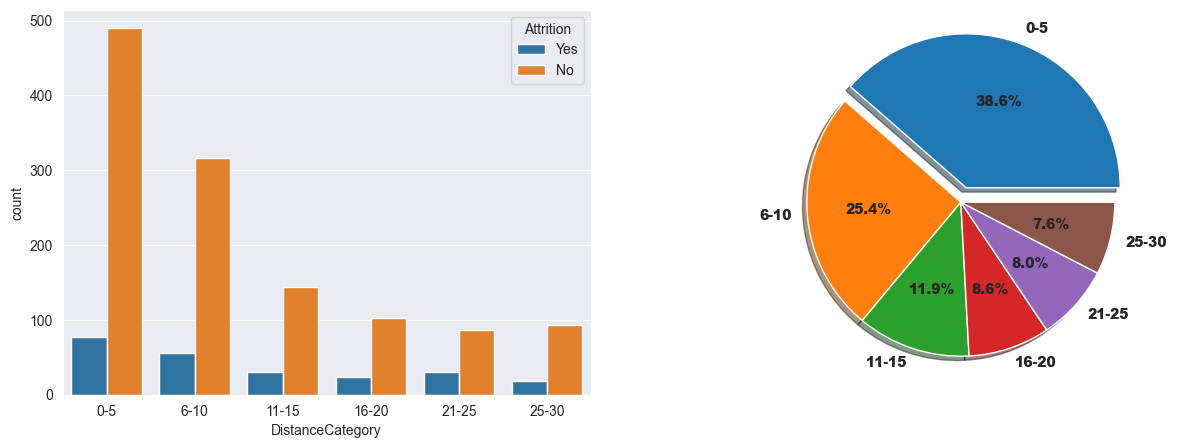

In [14]:
distance_eda = employee.copy()

bin_edges = [0,5,10,15,20,25, np.inf]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '25-30']

distance_eda['DistanceCategory'] = pd.cut(distance_eda['DistanceFromHome'], bins=bin_edges, labels=labels, right=False)
# distance_eda.head()

distance_counts = distance_eda["DistanceCategory"].value_counts(sort=False)
# distance_counts

fig, axs = plt.subplots(1, 2, figsize=(15,5))

distance_attrition = sns.countplot(data=distance_eda, x='DistanceCategory', hue='Attrition', ax=axs[0])
# for cont in distance_attrition.containers:
#     distance_attrition.bar_label(cont)
# with_hue(distance_attrition, distance_eda['DistanceCategory'], 6, 2)

plt.pie(distance_counts, labels=labels, autopct="%.1f%%", explode=[0.1, 0, 0, 0, 0, 0], shadow=True, startangle=0, textprops={"fontweight":"black","size":10})

plt.show()

#### 3.7 Education


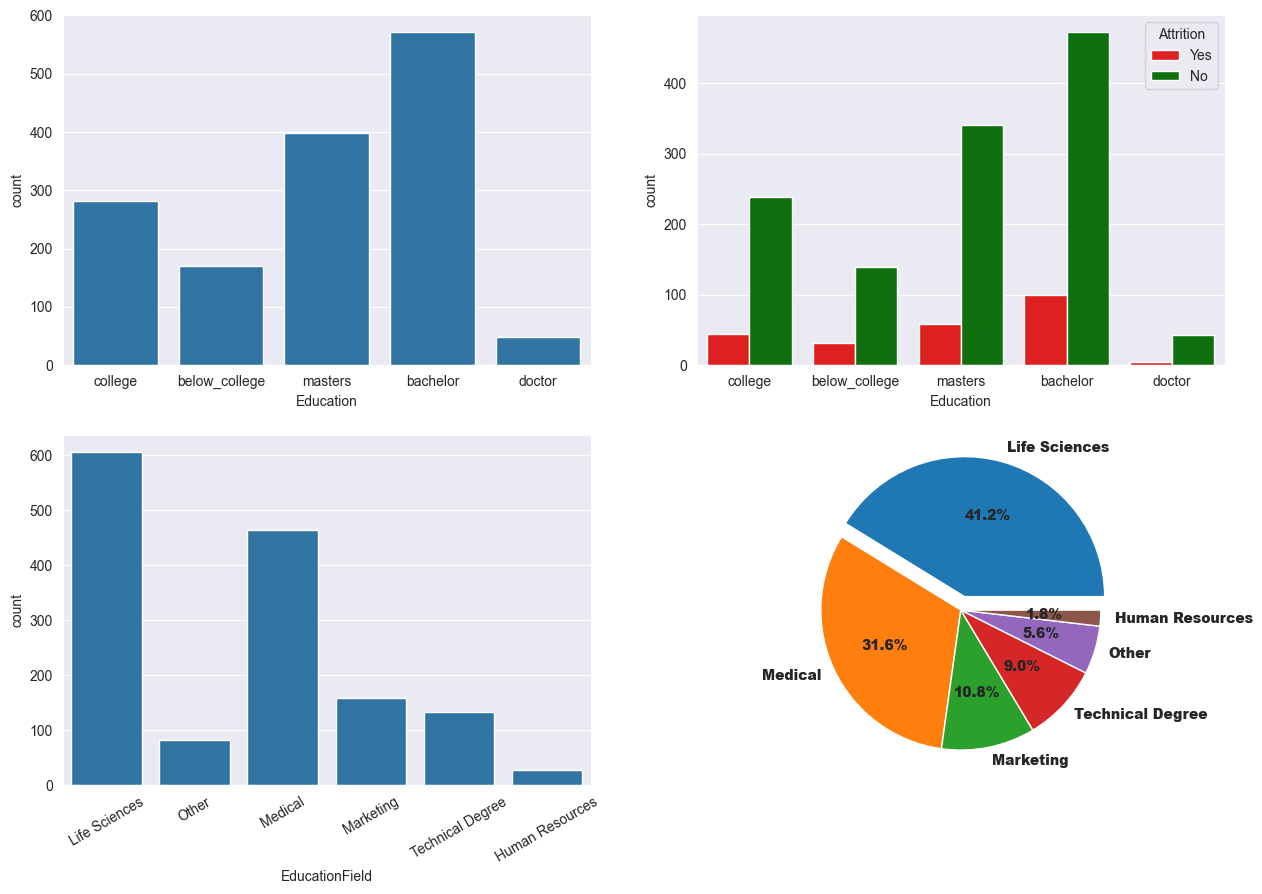

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(data=employee, x='Education', ax=axs[0,0])

sns.countplot(data=employee, x='Education', hue="Attrition",ax=axs[0,1], palette=["red", "green"])

sns.countplot(data=employee, x='EducationField', ax=axs[1,0])
axs[1,0].tick_params(axis='x', rotation=30)


edu_field_counts = employee["EducationField"].value_counts()
labels = ["Life Sciences", "Medical", "Marketing", "Technical Degree", "Other", "Human Resources"]      
plt.pie(edu_field_counts, labels=labels, autopct="%.1f%%", explode=[0.1, 0, 0, 0, 0, 0],startangle=0, textprops={"fontweight":"black","size":10})

plt.show()

#### 3.8 Environment Satisfaction 

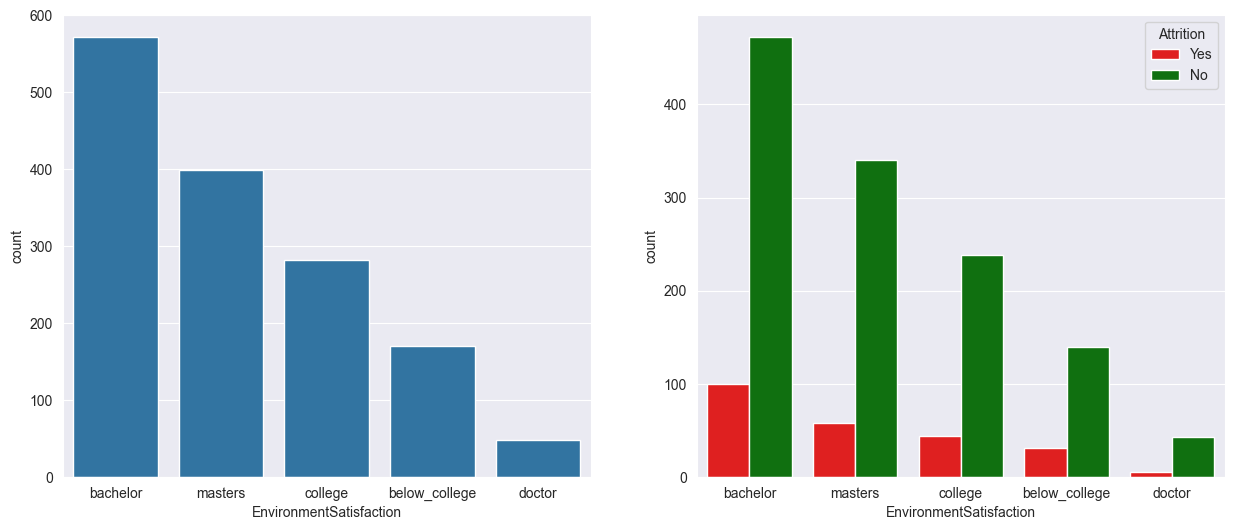

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=employee, x='EnvironmentSatisfaction', ax=axs[0], order = employee['EnvironmentSatisfaction'].value_counts().index)

sns.countplot(data=employee, x='EnvironmentSatisfaction', hue="Attrition", ax=axs[1], palette=["red", "green"], order = employee['EnvironmentSatisfaction'].value_counts().index)

plt.show()

#### 3.9 Hourly Rate

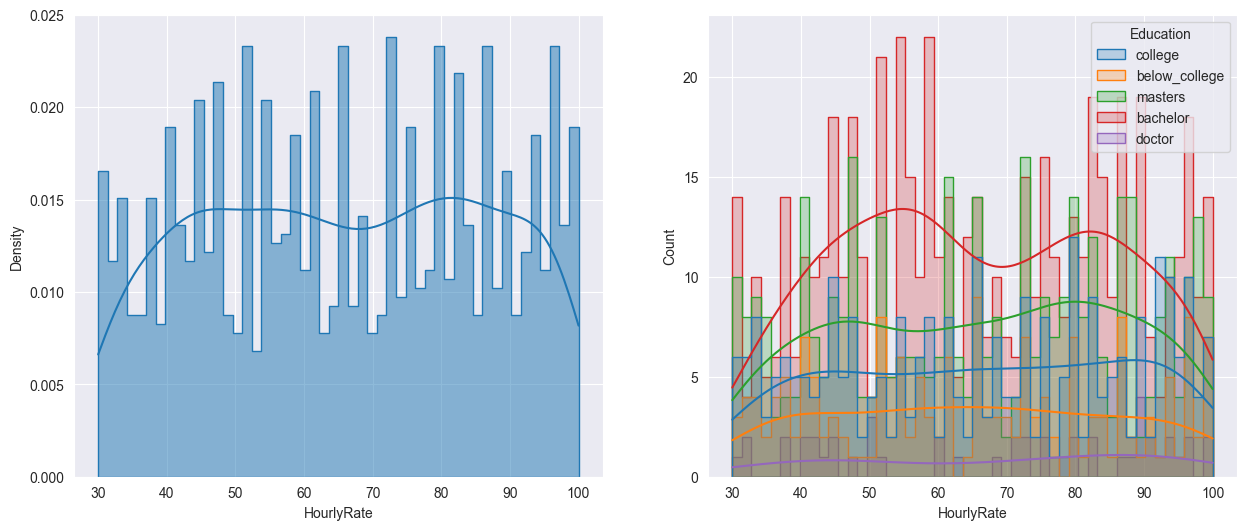

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))

sns.histplot(data=employee, x="HourlyRate", kde=True, bins=50, element="step", stat='density', ax=axs[0])

sns.histplot(data=employee, x="HourlyRate", kde=True, hue="Education",bins=50, element="step", ax=axs[1])

plt.show()

#### 3.10 Job Related

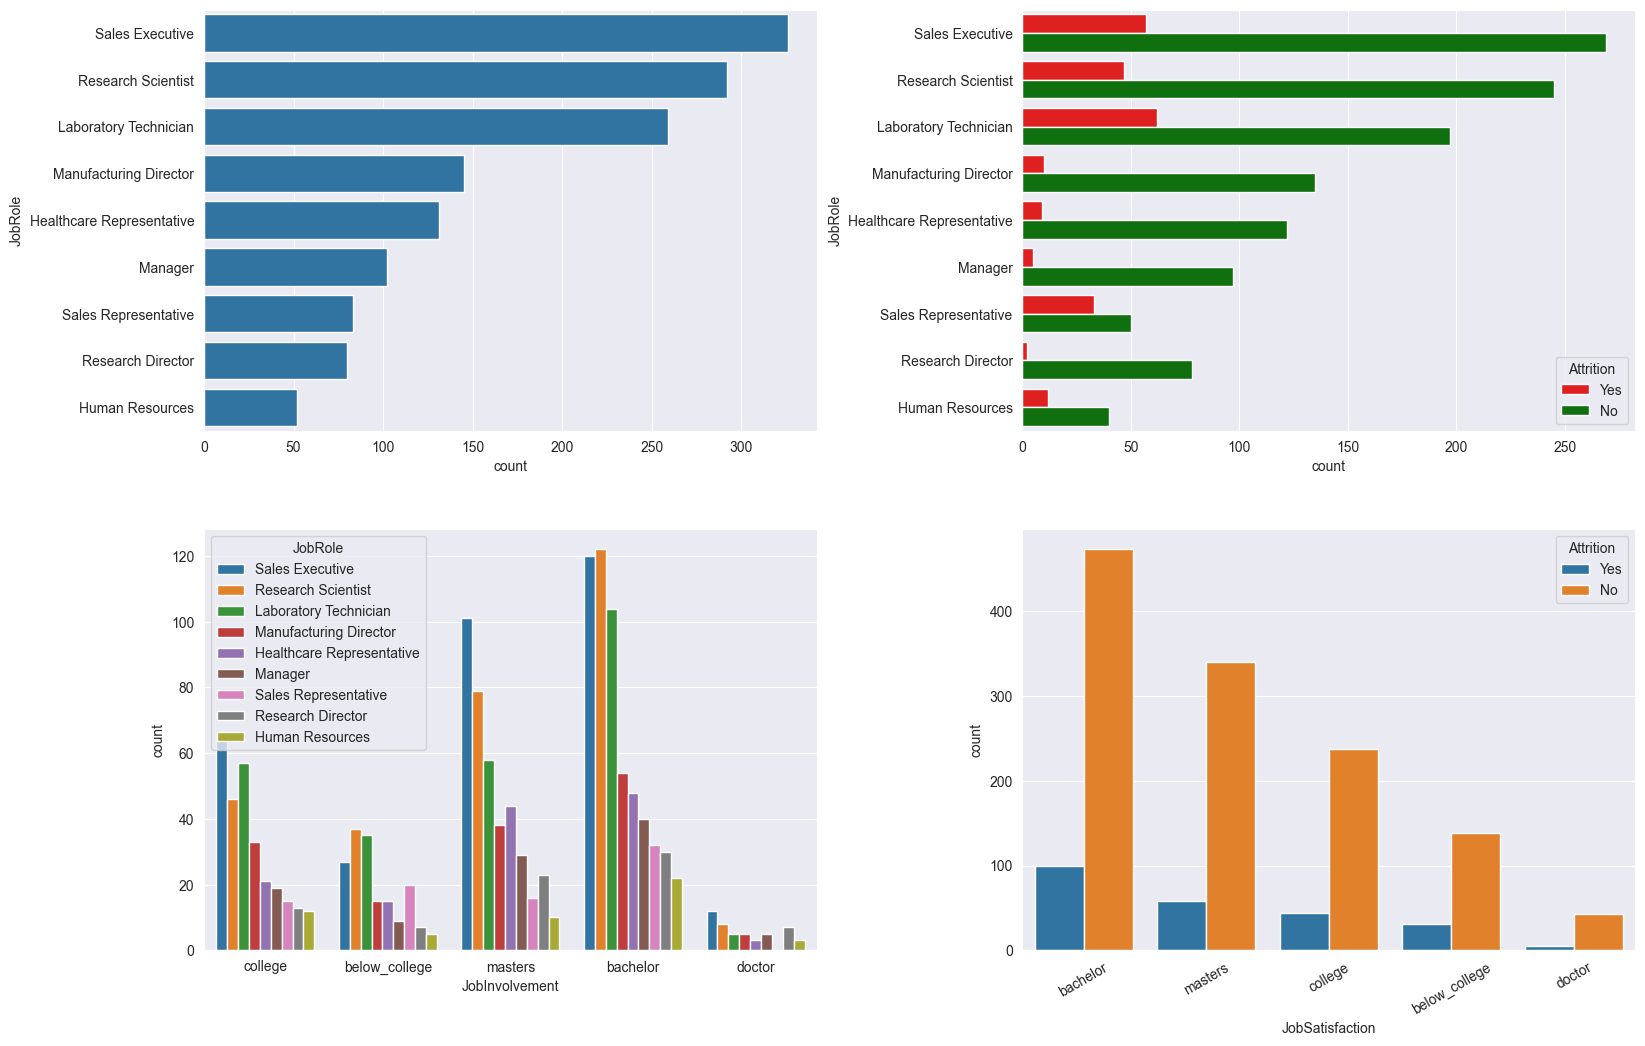

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
plt.tight_layout(w_pad=12, h_pad=5)

sns.countplot(data=employee, y='JobRole', ax=axs[0,0])

sns.countplot(data=employee, y='JobRole', hue="Attrition",ax=axs[0,1], palette=["red", "green"])

sns.countplot(data=employee, x='JobInvolvement',hue="JobRole", ax=axs[1,0])

sns.countplot(data=employee, x='JobSatisfaction', hue="Attrition", ax=axs[1,1], order = employee['JobSatisfaction'].value_counts().index)

axs[1,1].tick_params(axis='x', rotation=30)

plt.show()

#### 3.11 Marital Status

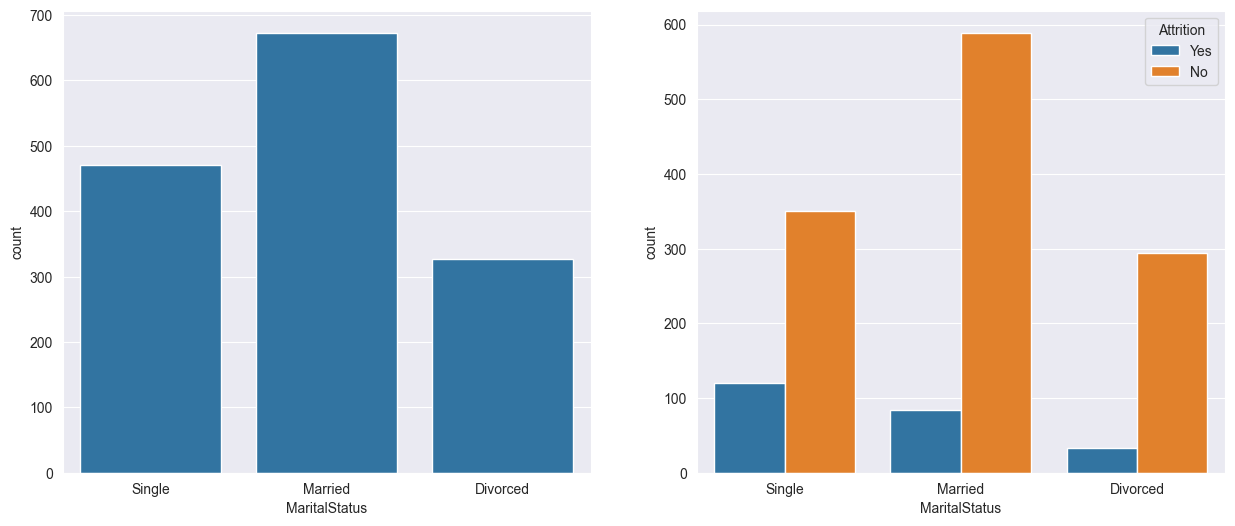

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=employee, x='MaritalStatus', ax=axs[0])

sns.countplot(data=employee, x='MaritalStatus', hue="Attrition", ax=axs[1])

plt.show()

#### 3.12 Number of Companies worked for

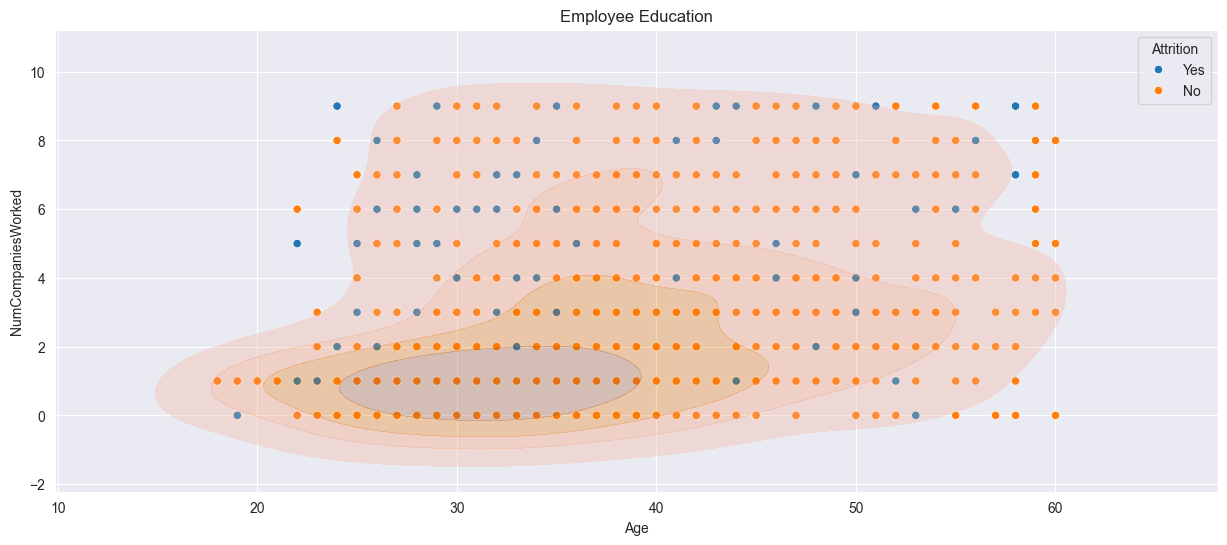

In [20]:
fig, axs = plt.subplots(figsize=(15,6))

sns.scatterplot(data=employee, y='NumCompaniesWorked', x="Age", hue="Attrition", ax=axs)
sns.kdeplot(data=employee, y="NumCompaniesWorked", x="Age", levels=5, fill=True, alpha=0.3,  ax=axs)

axs.set_title('Employee Education')

plt.show()

#### 3.13 Overtime

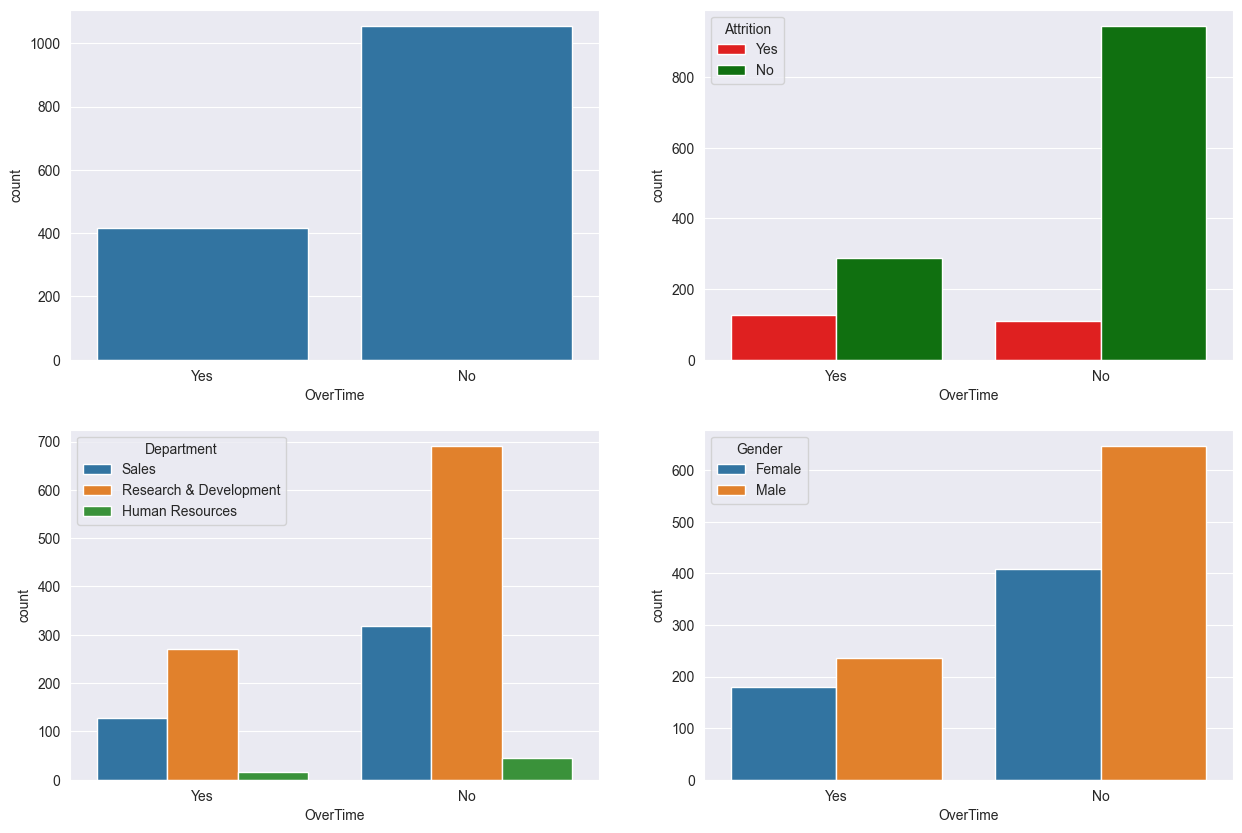

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
# plt.tight_layout(w_pad=12, h_pad=5)
sns.countplot(data=employee, x='OverTime', ax=axs[0,0])

sns.countplot(data=employee, x='OverTime', hue="Attrition",ax=axs[0,1], palette=["red", "green"])

sns.countplot(data=employee, x='OverTime',hue="Department", ax=axs[1,0])

sns.countplot(data=employee, x='OverTime', hue="Gender", ax=axs[1,1])

plt.show()

#### 3.14 Percentage Salary Hike

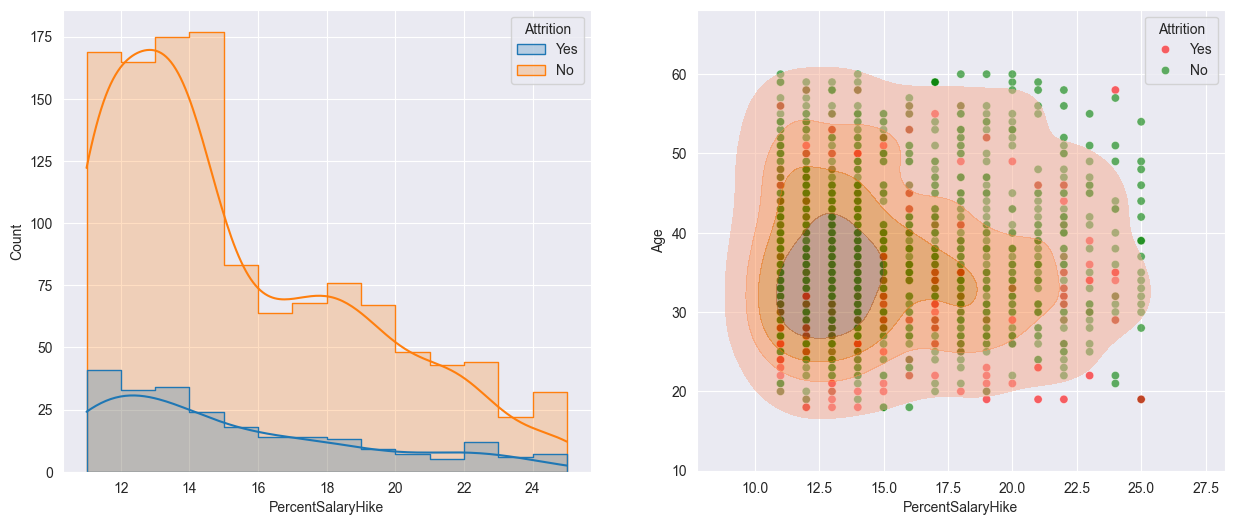

In [22]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))

sns.histplot(data=employee, x="PercentSalaryHike", hue="Attrition", kde=True, element="step", ax=axs[0])

sns.scatterplot(data=employee, x="PercentSalaryHike", y="Age", hue="Attrition",  ax=axs[1], alpha=0.6, palette=["red", "green"] )
sns.kdeplot(data=employee, y="Age", x="PercentSalaryHike", levels=5, fill=True, alpha=0.5,  ax=axs[1])


plt.show()

#### 3.15 Performance and Relationships

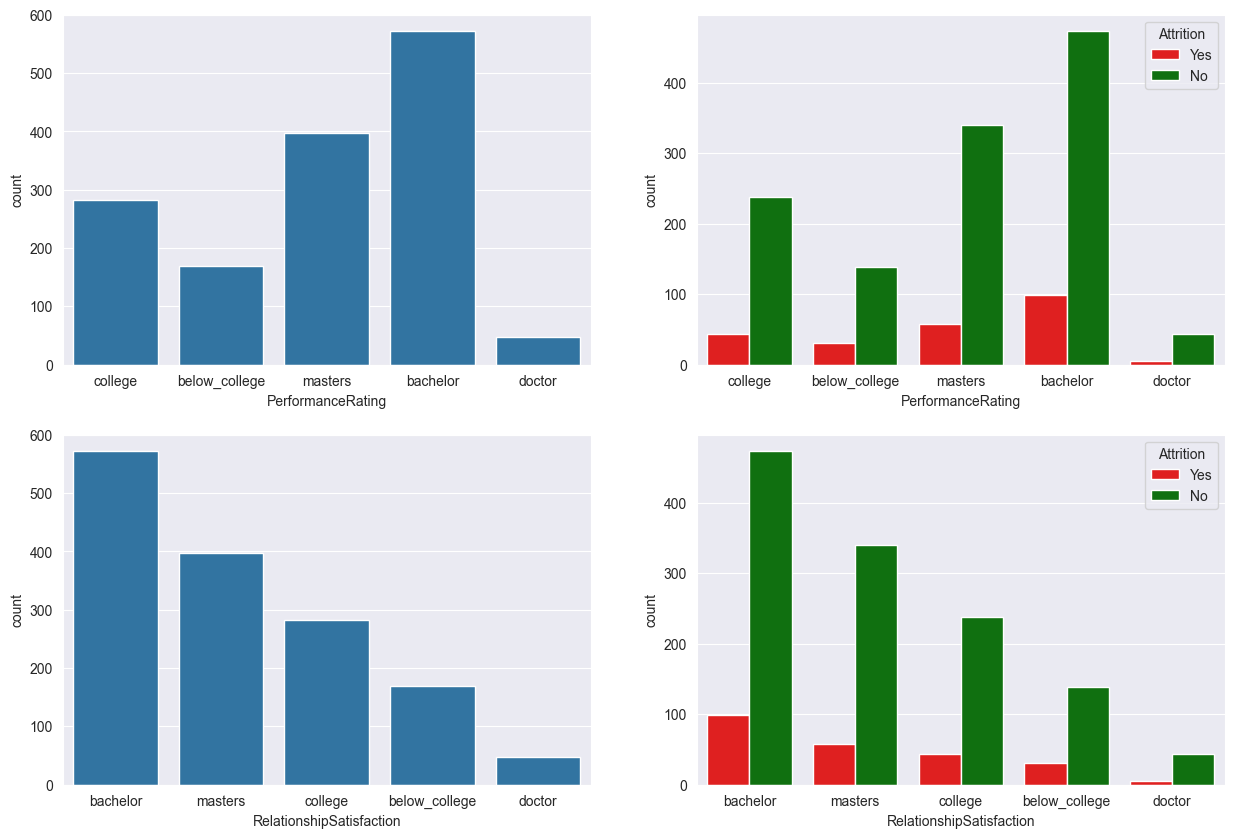

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
# plt.tight_layout(w_pad=12, h_pad=5)

sns.countplot(data=employee, x='PerformanceRating', ax=axs[0,0])

sns.countplot(data=employee, x='PerformanceRating', hue="Attrition",ax=axs[0,1], palette=["red", "green"])

sns.countplot(data=employee, x='RelationshipSatisfaction', ax=axs[1,0],  order = employee['RelationshipSatisfaction'].value_counts().index)

sns.countplot(data=employee, x='RelationshipSatisfaction', hue="Attrition", ax=axs[1,1], palette=["red", "green"], order = employee['RelationshipSatisfaction'].value_counts().index)

plt.show()

#### 3.16 Stock Option Level

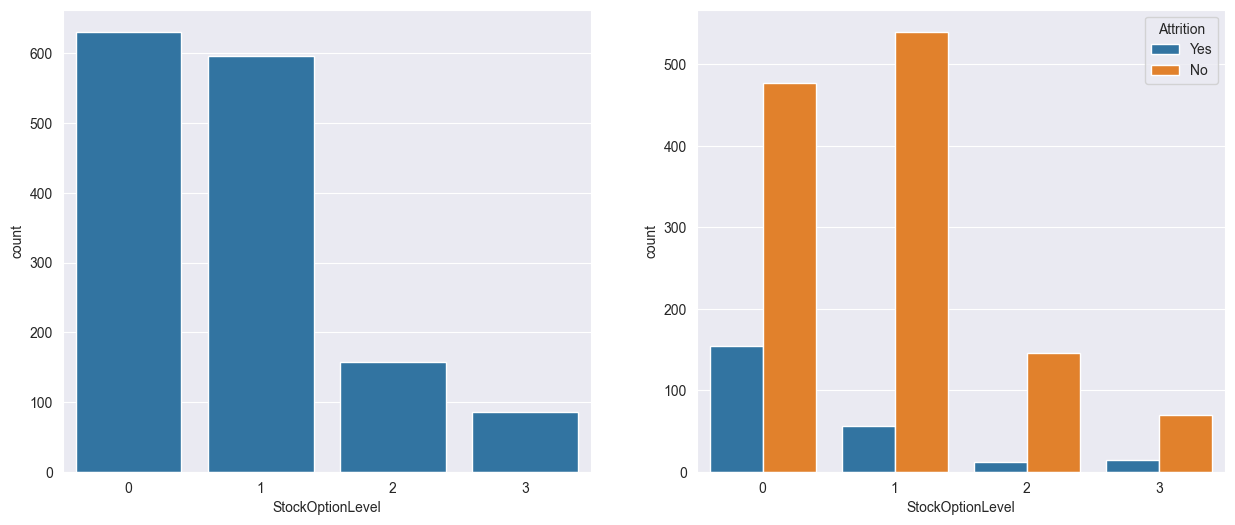

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=employee, x='StockOptionLevel', ax=axs[0])


sns.countplot(data=employee, x='StockOptionLevel', hue="Attrition")


plt.show()

#### 3.17 Working Years, Training, and Worklife balance

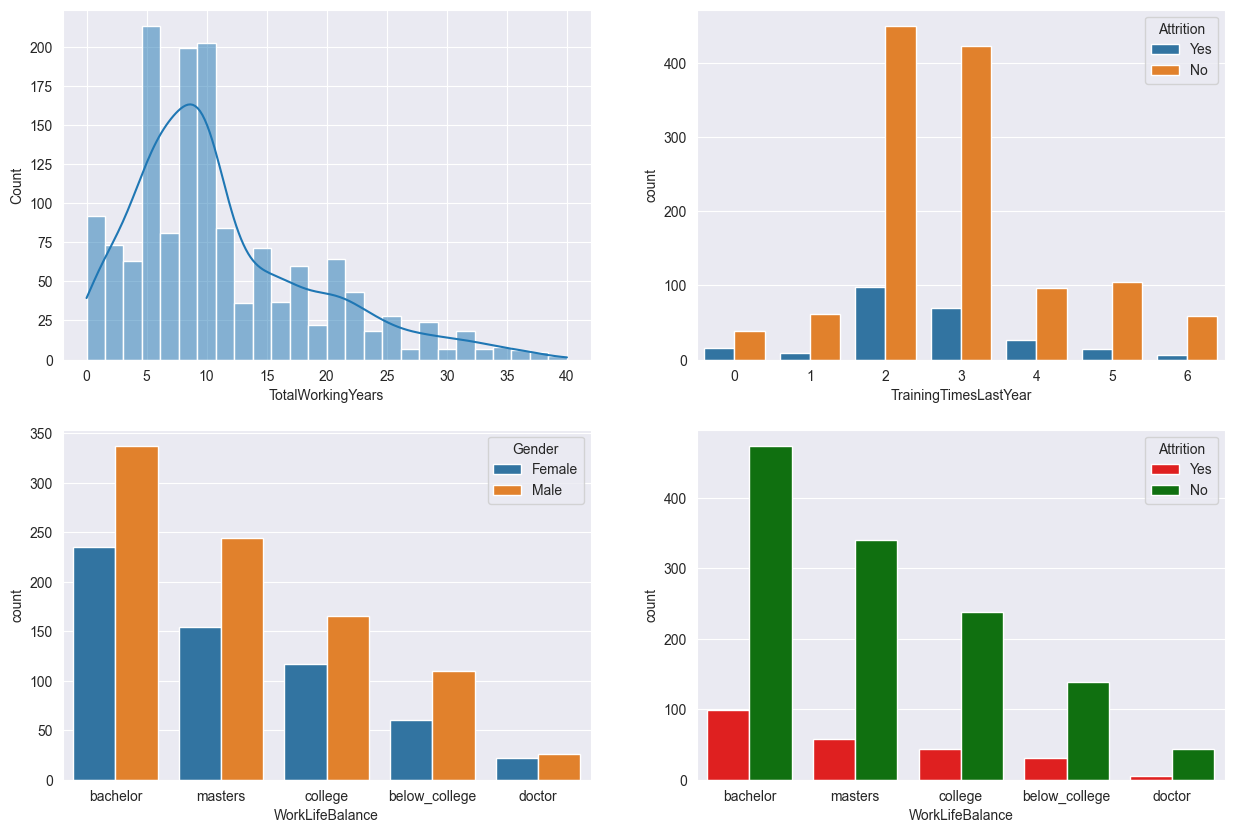

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
# plt.tight_layout(w_pad=12, h_pad=5)

sns.histplot(data=employee, x='TotalWorkingYears', kde=True, ax=axs[0,0])

sns.countplot(data=employee, x='TrainingTimesLastYear', hue="Attrition",  ax=axs[0,1])

sns.countplot(data=employee, x='WorkLifeBalance', ax=axs[1,0], hue="Gender", order = employee['WorkLifeBalance'].value_counts().index)

sns.countplot(data=employee, x='WorkLifeBalance', hue="Attrition", ax=axs[1,1], palette=["red", "green"], order = employee['WorkLifeBalance'].value_counts().index)
# # axs[1,1].tick_params(axis='x', rotation=30)

plt.show()

#### 3.18 Work Experinces 

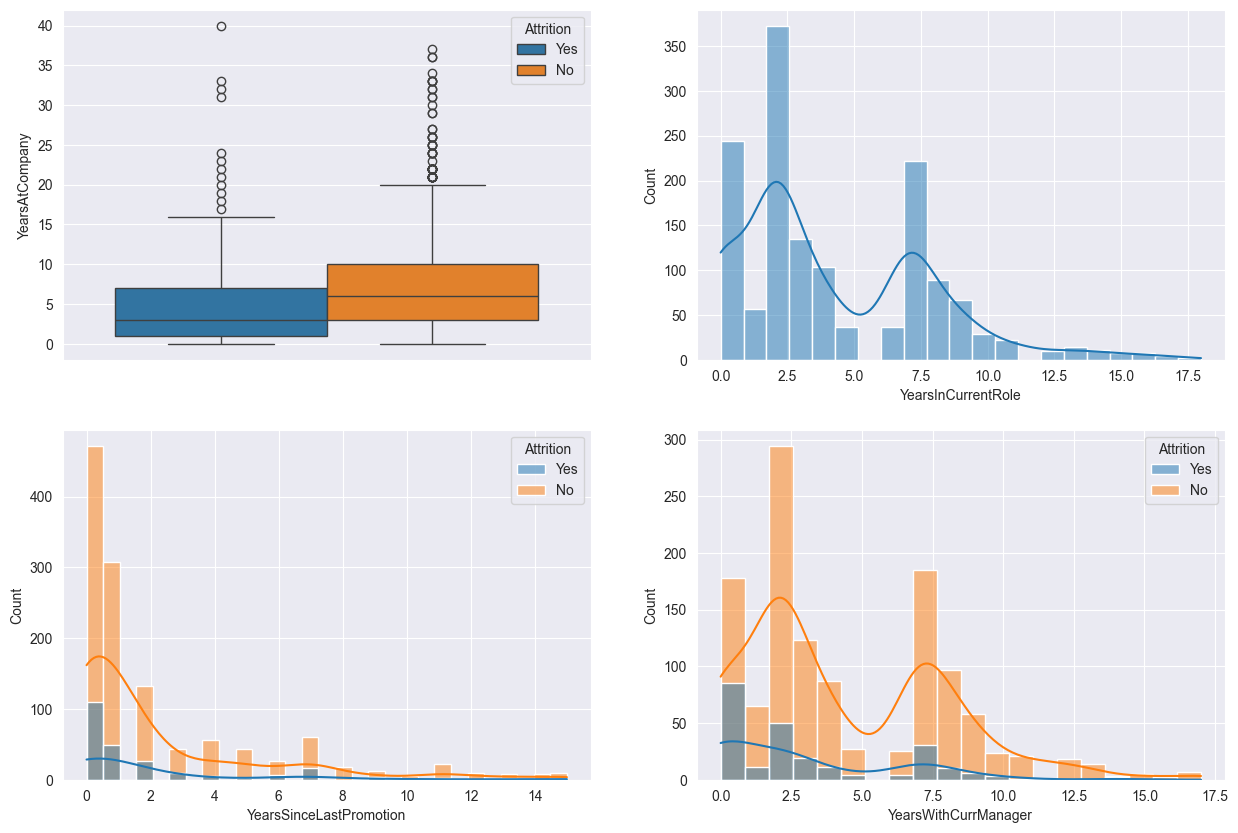

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
# plt.tight_layout(w_pad=12, h_pad=5)

sns.boxplot(data=employee, y='YearsAtCompany', hue="Attrition", ax=axs[0,0])

sns.histplot(data=employee, x='YearsInCurrentRole', kde=True,  ax=axs[0,1])

sns.histplot(data=employee, x='YearsSinceLastPromotion', hue="Attrition", kde=True, ax=axs[1,0])

sns.histplot(data=employee, x='YearsWithCurrManager', hue="Attrition", kde=True, ax=axs[1,1] )

plt.show()

### 4. Feature Engineering 
- Create new features
- Feature selection
- Feature transformations
- Create pipelines

Let us first convert the `Attrition` into an int type so that it can be used in the model. 

In [27]:
attrition_dict = {"Yes": 1, "No": 0}

employee['Attrition'] = employee['Attrition'].replace(attrition_dict)
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,college,Life Sciences,college,Female,94,college,2,Sales Executive,college,Single,5993,19479,8,Y,Yes,11,college,college,0,8,0,college,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,below_college,Life Sciences,below_college,Male,61,below_college,2,Research Scientist,below_college,Married,5130,24907,1,Y,No,23,below_college,below_college,1,10,3,below_college,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,college,Other,college,Male,92,college,1,Laboratory Technician,college,Single,2090,2396,6,Y,Yes,15,college,college,0,7,3,college,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,masters,Life Sciences,masters,Female,56,masters,1,Research Scientist,masters,Married,2909,23159,1,Y,Yes,11,masters,masters,0,8,3,masters,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,below_college,Medical,below_college,Male,40,below_college,1,Laboratory Technician,below_college,Married,3468,16632,9,Y,No,12,below_college,below_college,1,6,3,below_college,2,2,2,2


As for engineering new features, I've decided to focus more on the parameter tuning for the models as there was no potential for new features to be effective. In short deriving feature from a column would short high correlation to that column which is a given.

#### 4.1 Feature Selection

##### 4.1.1 Numerical Feature correlation 

In [28]:
# Create a list so we can append the highest correlated feature
selected_features = []

num_corr, num = mf.find_numerical_features(employee, "Attrition", sorted_corr=True)
num_corr

,Column,Correlation With Attrition
1,Attrition,1.000000
3,DistanceFromHome,0.077924
8,NumCompaniesWorked,0.043494
7,MonthlyRate,0.015170
4,HourlyRate,-0.006846
9,PercentSalaryHike,-0.013478
15,YearsSinceLastPromotion,-0.033019
2,DailyRate,-0.056652
12,TrainingTimesLastYear,-0.059478
13,YearsAtCompany,-0.134392


In [29]:
high_corr_num = num_corr[(num_corr["Correlation With Attrition"] > 0) & (num_corr["Correlation With Attrition"] < 1)]
high_corr_num_feat_names = high_corr_num["Column"].values

In [30]:
sel_features = [col for col in high_corr_num_feat_names]
sel_features

['DistanceFromHome', 'NumCompaniesWorked', 'MonthlyRate']

sel_features = [col for col in high_corr_num_feat_names]
sel_features

##### 4.1.2 Categorical Feature correlation 

In [31]:
cat_corr, c_col = mf.find_categorical_features(employee, "Attrition", sorted_corr=True)
cat_corr

,Column,Correlation With Attrition
11,OverTime,0.242749
7,JobRole,0.230701
9,MaritalStatus,0.173386
0,BusinessTravel,0.122880
3,EducationField,0.086617
1,Department,0.077375
5,Gender,0.008897
2,Education,0.000000
4,EnvironmentSatisfaction,0.000000
6,JobInvolvement,0.000000


In [32]:
high_corr_cat = cat_corr[(cat_corr["Correlation With Attrition"] > 0.1) & (cat_corr["Correlation With Attrition"] < 1)]
high_corr_cat_feat_names = high_corr_cat["Column"].values

In [33]:
for col in high_corr_cat_feat_names:
    sel_features.append(col)
    
sel_features #can add 

['DistanceFromHome',
 'NumCompaniesWorked',
 'MonthlyRate',
 'OverTime',
 'JobRole',
 'MaritalStatus',
 'BusinessTravel']

#### 4.2 Feature Transformation

For transformation we will first split the data into X and y variables

In [34]:
X = employee[sel_features].copy()
y = employee["Attrition"].copy()

print(f"Shape of X: {X.shape}")

X_num_cols = X.select_dtypes(include=[np.number]).columns
X_cat_cols = X.select_dtypes(exclude=[np.number]).columns

print(f"Numerical columns of X: {X_num_cols}")
print(f"Categorical columns of X: {X_cat_cols}")

Shape of X: (1470, 7)
Numerical columns of X: Index(['DistanceFromHome', 'NumCompaniesWorked', 'MonthlyRate'], dtype='object')
Categorical columns of X: Index(['OverTime', 'JobRole', 'MaritalStatus', 'BusinessTravel'], dtype='object')


We will use `StandardScaler` for numerical scaling and `OneHotEncoder` for encoding categorical columns

In [35]:
num_scaler = StandardScaler()
ohe_encoder = OneHotEncoder()

transformer = ColumnTransformer(
    [
        ("X_OneHotEncoder", ohe_encoder, X_cat_cols),
        ("X_StandardScaler", num_scaler, X_num_cols)
    ]
)

In [36]:
X = transformer.fit_transform(X)

print(f"New shape of X: {X.shape}")


New shape of X: (1470, 20)


#### 4.3 Splitting the dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((1176, 20), (294, 20))

In [38]:
X_train.shape[1]

20

### 5. Model Selection and Training 

#### 5.1 Decision Tree Classifier

In [39]:
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_dtc = (y_pred_dtc > 0.5).astype(int).reshape(-1,)
dtc_accuracy = mf.calculate_accuracy(y_test, y_pred_dtc)
print(f"The accuracy of Decision Tree is: {dtc_accuracy}")

The accuracy of Decision Tree is: 0.7755102040816326


#### 5.2 Random Forest Classifier

In [40]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_rfc = (y_pred_rfc > 0.5).astype(int).reshape(-1,)
rfc_accuracy = mf.calculate_accuracy(y_test, y_pred_rfc)
print(f"The accuracy of Decision Tree is: {rfc_accuracy}")

The accuracy of Decision Tree is: 0.8673469387755102


#### 5.3 Neural Networks Using TensorFlow

In [41]:
classifier, history = mf.nn_classifier(X_train, y_train, 6, 4, 0.01, 100, X_train.shape[1])

Epoch 1/100
37/37 [==============================] - 2s 2ms/step - loss: 0.6202 - accuracy: 0.7415 - precision: 0.1919 - recall: 0.1667
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8325 - precision: 0.6667 - recall: 0.0101    
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8478 - precision: 0.6203 - recall: 0.2475   
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8520 - precision: 0.6579 - recall: 0.2525   
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8546 - precision: 0.6311 - recall: 0.3283
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8520 - precision: 0.6333 - recall: 0.2879
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8554 - precision: 0.6273 - recall: 0.3485
Epoch 8/100
37/37 [===================

In [42]:
y_pred_nn = classifier.predict(X_test).ravel()
y_pred_nn = (y_pred_nn > 0.5).astype(int).reshape(-1,)
nn_accuracy = mf.calculate_accuracy(y_test, y_pred_nn)
nn_accuracy

10/10 [==============================] - 0s 0s/step


0.8061224489795918

### 6. Model Evaluation



#### 6.1 Accuracy Comparision of all models

In [43]:
models = ["Decision Trees", "Random Forest Classifier", "Neural Networks"]
models_accuracy = [dtc_accuracy, rfc_accuracy, nn_accuracy]
acc_result = pd.DataFrame({
    "Model": [model for model in models],
    "Accuracy": [acc for acc in models_accuracy]
})
acc_result

,Model,Accuracy
0,Decision Trees,0.775510
1,Random Forest Classifier,0.867347
2,Neural Networks,0.806122


#### 6.2 Decision Tree figure

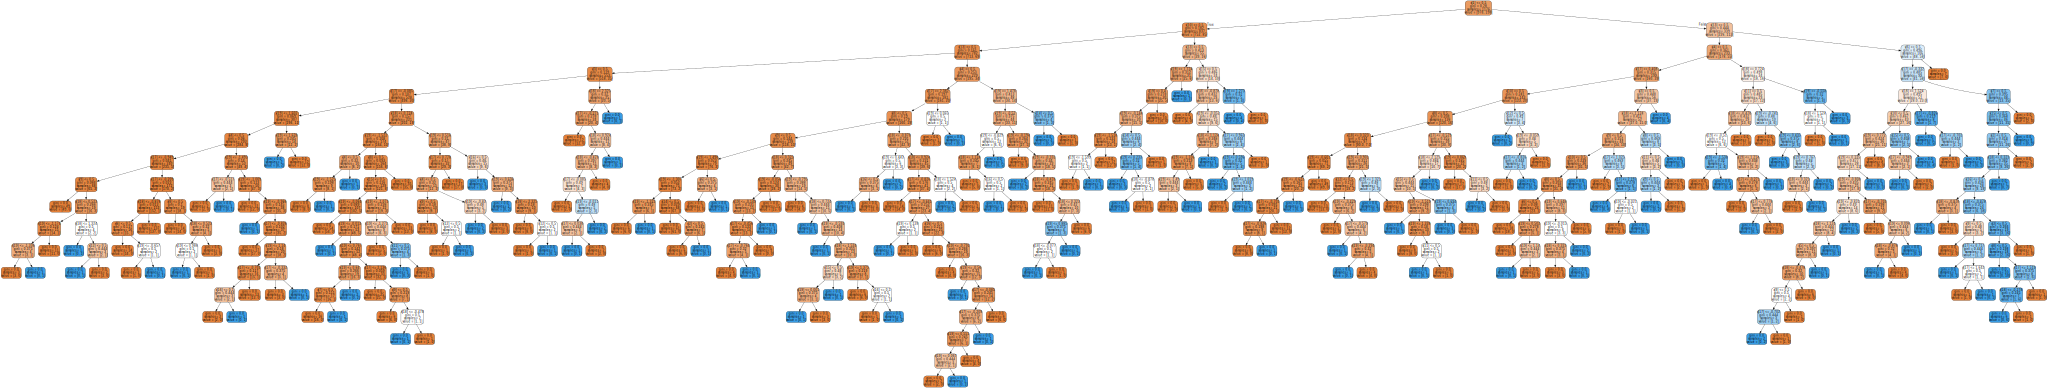

In [44]:
export_graphviz(dtc, out_file="dtc_clf.dot", rounded=True, filled=True)
Source.from_file("dtc_clf.dot")

#### 6.3 ROC curve for all models

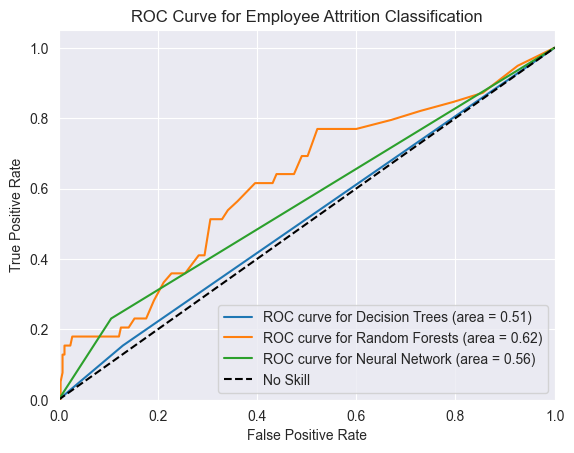

In [45]:
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, y_pred_proba_dtc)
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, y_pred_proba_rfc)
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

# y_pred_nn = classifier.predict(X_test).ravel()
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, y_pred_nn)
nn_auc = auc(nn_fpr, nn_tpr)

plt.figure()  
plt.plot(dtc_fpr, dtc_tpr, label='ROC curve for Decision Trees (area = %0.2f)' % dtc_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, label='ROC curve for Random Forests (area = %0.2f)' % rfc_roc_auc)
plt.plot(nn_fpr, nn_tpr, label='ROC curve for Neural Network (area = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Employee Attrition Classification')
plt.legend()
plt.show()

#### 6.3 Evaluation of Neural Net

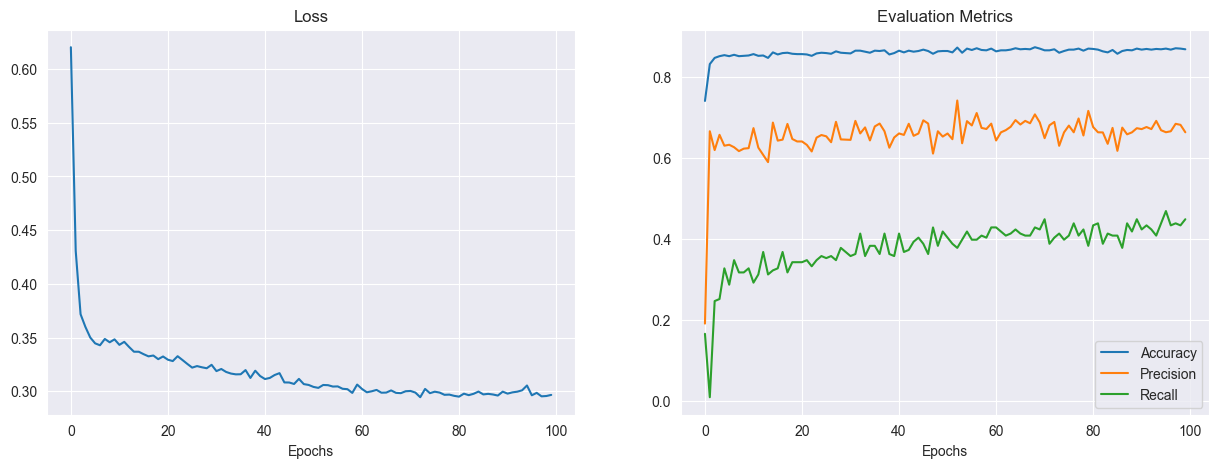

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

sns.lineplot(x=history.epoch, y=history.history["loss"], ax=axs[0])
axs[0].set_title("Loss")
axs[0].set(xlabel='Epochs')

sns.lineplot(x=history.epoch, y=history.history["accuracy"], ax=axs[1], label="Accuracy")
sns.lineplot(x=history.epoch, y=history.history["precision"], ax=axs[1], label="Precision")
sns.lineplot(x=history.epoch, y=history.history["recall"], ax=axs[1], label="Recall")
axs[1].set_title("Evaluation Metrics")
axs[1].set(xlabel='Epochs')
axs[1].legend()

plt.show()

### 7. Model Tuning

To tune the model we will use `RandomizedSearchCV` for Decision Trees and Random forest. 

#### 7.1 Parameter Dictionary 

In [47]:
param_dict = {
    "max_depth": [3,5,7,9,10],
    "max_features": sp_randint(3,28),
    "min_samples_split": sp_randint(2, 28),
    "criterion": ["gini", "entropy"]   
}

#### 7.2 Decision Tree Classifier RandomSearchCV

In [48]:
rand_dtc = tree.DecisionTreeClassifier()

rand_search_dtc = RandomizedSearchCV(rand_dtc, param_distributions=param_dict, cv=3, random_state=42)

rand_search_dtc.fit(X_train, y_train)

print(rand_search_dtc.best_params_)

best_param_dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=15, min_samples_split=13, random_state=42)

best_param_dtc.fit(X_train,y_train)

y_pred_dtc_best_param = best_param_dtc.predict(X_test)
y_pred_proba_dtc_best_param = best_param_dtc.predict_proba(X_test)[:,1]
y_pred_dtc_best_param = (y_pred_dtc_best_param > 0.5).astype(int).reshape(-1,)
dtc_accuracy_bp = mf.calculate_accuracy(y_test, y_pred_dtc_best_param)
dtc_accuracy_bp

{'criterion': 'gini', 'max_depth': 3, 'max_features': 12, 'min_samples_split': 17}


0.8503401360544217

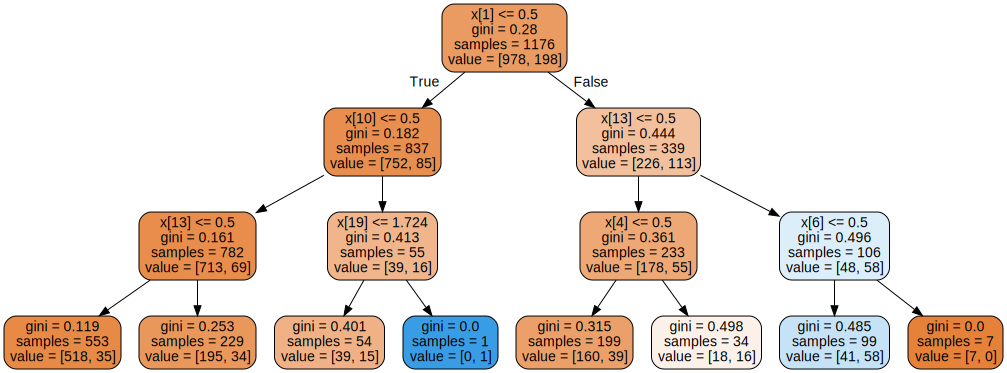

In [49]:
export_graphviz(best_param_dtc, out_file="dtc_clf_rand_search.dot", rounded=True, filled=True)
Source.from_file("dtc_clf_rand_search.dot")

#### 7.2 Random Forest Classifier RandomSearchCV

In [50]:
rand_rfc = RandomForestClassifier()

rand_search_rfc = RandomizedSearchCV(rand_rfc, param_distributions=param_dict, cv=3, random_state=42)

rand_search_rfc.fit(X_train, y_train)

print(rand_search_rfc.best_params_)

best_param_rfc = RandomForestClassifier(criterion='entropy', max_depth=7, max_features=24, min_samples_split=22, random_state=42)

best_param_rfc.fit(X_train,y_train)

y_pred_rfc_best_param = best_param_rfc.predict(X_test)
y_pred_proba_rfc_best_param = best_param_rfc.predict_proba(X_test)[:,1]
y_pred_rfc_best_param = (y_pred_rfc_best_param > 0.5).astype(int).reshape(-1,)
rfc_accuracy_bp = mf.calculate_accuracy(y_test, y_pred_rfc_best_param)
rfc_accuracy_bp

{'criterion': 'gini', 'max_depth': 7, 'max_features': 14, 'min_samples_split': 24}


0.8571428571428571

#### 7.3 Neural Nets

In [51]:
classifier, history = mf.nn_classifier(X_train, y_train, 16, 14, 0.01, 100, X_train.shape[1])

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.8223 - precision: 0.1333 - recall: 0.0101
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8342 - precision: 0.6364 - recall: 0.0354   
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8546 - precision: 0.6901 - recall: 0.2475
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8605 - precision: 0.6889 - recall: 0.3131
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8588 - precision: 0.6702 - recall: 0.3182
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8648 - precision: 0.6726 - recall: 0.3838
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8622 - precision: 0.6698 - recall: 0.3586
Epoch 8/100
37/37 [==========================

In [52]:
y_pred_nn = classifier.predict(X_test).ravel()
y_pred_nn = (y_pred_nn > 0.5).astype(int).reshape(-1,)
nn_accuracy = mf.calculate_accuracy(y_test, y_pred_nn)
nn_accuracy

10/10 [==============================] - 0s 2ms/step


0.7857142857142857

#### 7.4 ROC Evaluation

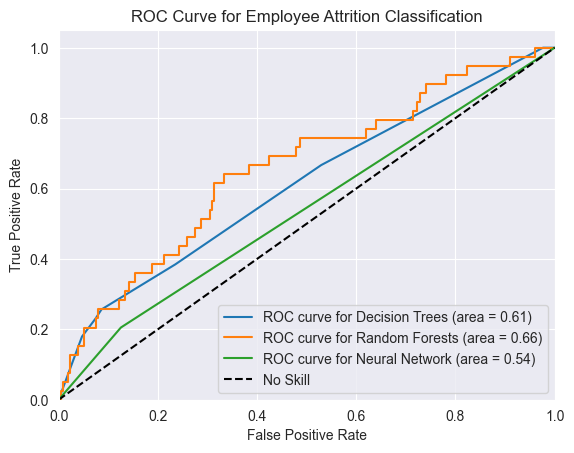

In [53]:
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, y_pred_proba_dtc_best_param)
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, y_pred_proba_rfc_best_param)
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

# y_pred_nn = classifier.predict(X_test).ravel()
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, y_pred_nn)
nn_auc = auc(nn_fpr, nn_tpr)

plt.figure()  
plt.plot(dtc_fpr, dtc_tpr, label='ROC curve for Decision Trees (area = %0.2f)' % dtc_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, label='ROC curve for Random Forests (area = %0.2f)' % rfc_roc_auc)
plt.plot(nn_fpr, nn_tpr, label='ROC curve for Neural Network (area = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Employee Attrition Classification')
plt.legend()
plt.show()

# Summary

- The dataset was small and there were some columns that were not clearly distinguishable like `MonthlyRate` and `MonthlyIncome`. Most of the columns were mainly for exploratory purposes. Another note of the data set is that, most of the collected data was biased in the sense that there were more bachelors compared to phd employees. 
- Models used were Decision Trees, Random Forests and Neural Networks. Out of all of them **Random Forest** performed the best.


- Accuracy of Decision Tree: 85%
- Accuracy of Random Forest: 86%
- Accuracy of Neural Network : 80%
- The model that should be deployed is Random Forest. 
- Future work would be to use more features to test accuracies or to increase the data collection regarding to attrition. 

For this project I mainly focused on the machine learning aspect while keeping the features the same. As this is a machine learning class, I wanted to try and imporve the accuracies of the model by parameter tuning and see if it was possible with this set of features. 

##### References

- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
- https://mljar.com/blog/visualize-decision-tree/